In [1]:
import osmnx as ox
import contextily as cx
import matplotlib.pyplot as plt
import cenpy

/opt/anaconda3/envs/JeepneyRerouting/lib/python3.8/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [17]:
# bounding box for Subangdaku Flyover (zoomed out)
# north, south, east, west
BOUNDING_BOX = (10.32911, 10.31629, 123.93381, 123.91896)

In [2]:
# bounding box for Subangdaku Flyover
# north, south, east, west
BOUNDING_BOX = (10.324546, 10.321295, 123.927353, 123.922310)

In [3]:
flyover_graph = ox.graph_from_bbox(bbox=BOUNDING_BOX)

/tmp/ipykernel_24497/3150808005.py:1: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  flyover_graph = ox.graph_from_bbox(bbox=BOUNDING_BOX)


In [4]:
flyover_graph

##Plot Flyover

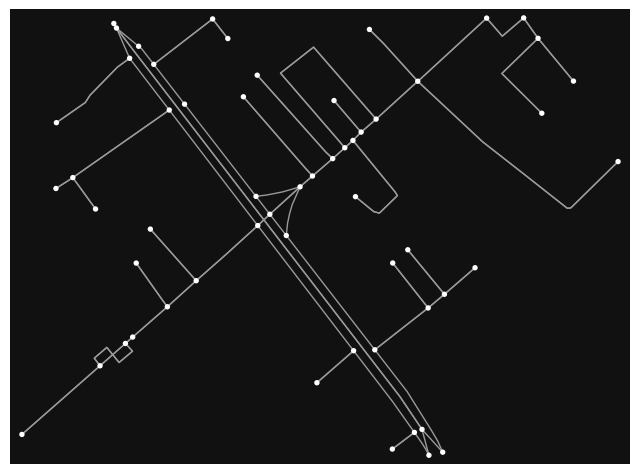

In [5]:
plot = ox.plot_graph(flyover_graph)

/opt/anaconda3/envs/JeepneyRerouting/lib/python3.8/site-packages/osmnx/plot.py:616: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  fig, ax = plot_graph(


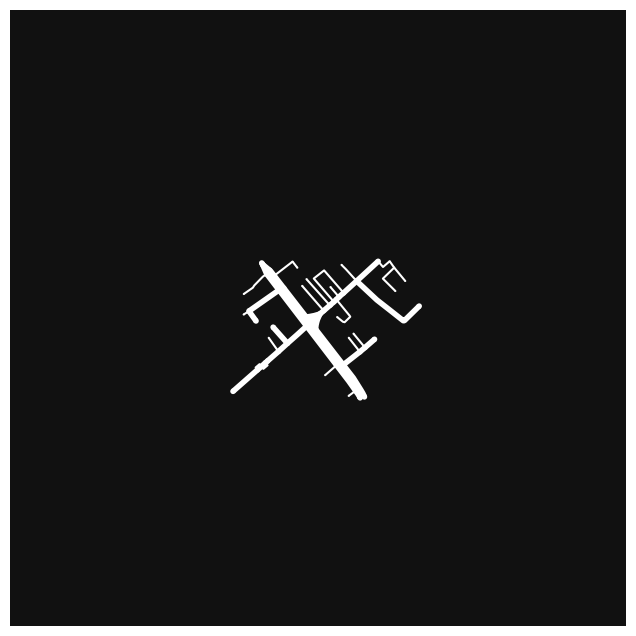

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [24]:
ox.plot_figure_ground(flyover_graph)

##Overlaying Maps

In [5]:
cebu_nodes, cebu_streets = ox.graph_to_gdfs(flyover_graph)

In [25]:
cebu_streets.columns.values

array(['osmid', 'lanes', 'ref', 'name', 'highway', 'maxspeed', 'oneway',
       'reversed', 'length', 'geometry', 'bridge', 'access', 'service'],
      dtype=object)

In [26]:
cebu_streets.head()

osmid lanes  ref                  name  \
u         v          key                                               
446096986 5905589986 0     37981564     4    8    Lopez Jaena Street   
          579619487  0    304632203     4    8    Lopez Jaena Street   
          612942026  0    590032303   NaN  NaN                   NaN   
490265719 579619214  0     45489270   NaN  NaN  Hernan Cortes Street   
494121285 8366180946 0    900615506     1  NaN  Hernan Cortes Street   

                               highway maxspeed  oneway  reversed  length  \
u         v          key                                                    
446096986 5905589986 0         primary       50   False     False  13.446   
          579619487  0         primary       50   False      True  33.294   
          612942026  0    primary_link       50    True     False  36.851   
490265719 579619214  0       secondary       40   False      True   4.273   
494121285 8366180946 0       secondary       40    True     False  25.150   

                                                                   geometry  \
u         v          key                                                      
446096986 5905589986 0    LINESTRING (123.92474 10.32329, 123.92483 10.3...   
          579619487  0    LINESTRING (123.92474 10.32329, 123.92451 10.3...   
          612942026  0    LINESTRING (123.92474 10.32329, 123.92461 10.3...   
490265719 579619214  0    LINESTRING (123.92335 10.32449, 123.92337 10.3...   
494121285 8366180946 0    LINESTRING (123.92580 10.32135, 123.92565 10.3...   

                         bridge access service  
u         v          key                        
446096986 5905589986 0      NaN    NaN     NaN  
          579619487  0      NaN    NaN     NaN  
          612942026  0      NaN    NaN     NaN  
490265719 579619214  0      NaN    NaN     NaN  
494121285 8366180946 0      NaN    NaN     NaN

In [12]:
cebu_nodes.head()

,y,x,street_count,geometry
osmid,,,,
446096986,10.323295,123.924740,4,POINT (123.92474 10.32329)
490265719,10.324494,123.923351,3,POINT (123.92335 10.32449)
494121285,10.321348,123.925804,3,POINT (123.92580 10.32135)
579619214,10.324460,123.923371,4,POINT (123.92337 10.32446)
579619329,10.322938,123.924638,3,POINT (123.92464 10.32294)


In [8]:
# read the coordinate system
cebu_streets.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
cebu_nodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [15]:
# convert coordinate system to mercator
cebu_streets_mercator = cebu_streets.to_crs(epsg=3857)
cebu_nodes_mercator = cebu_streets.to_crs(epsg=3857)

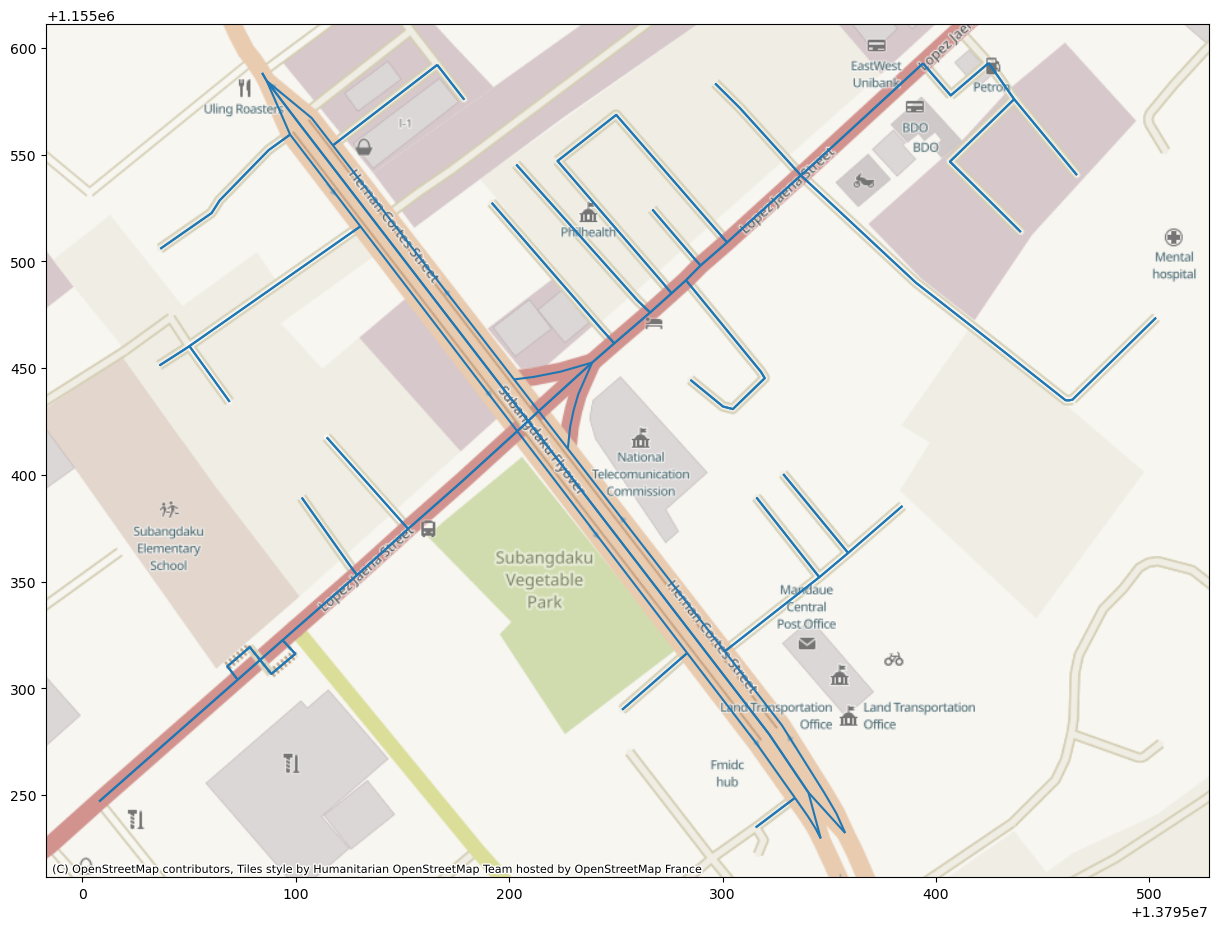

In [21]:
f,ax = plt.subplots(1,1, figsize=(15,15))
cebu_streets_mercator.plot(linewidth=.25, ax=ax, color='k')
cebu_nodes_mercator.plot(ax=ax)
cx.add_basemap(ax=ax, url=cx.providers.CartoDB.Positron)